<a href="https://colab.research.google.com/github/Meeta14/Shala-Assignments/blob/master/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [0]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)

In [0]:
data.head()

,0,1
0,0,0.019404
1,1,0.043634
2,2,0.023797
3,3,0.444340
4,4,0.578160


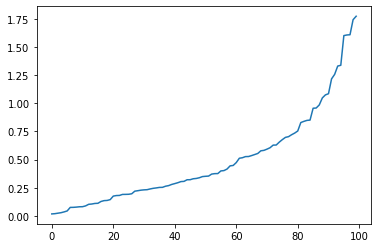

In [0]:
arr = data[1].to_numpy()
arr.sort()
plt.plot(arr)

# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

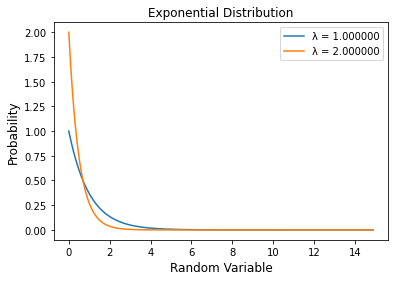

In [0]:
#val = np.arange(1, 2)
x = np.arange(0, 15, 0.1)

for Lambda in range(1, 3):
    y = Lambda*np.exp(-Lambda*x)
    plt.plot(x,y, label="λ = {:f}".format(Lambda))
    plt.xlabel('Random Variable', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Exponential Distribution")
    plt.legend()

In [0]:
likelihood_1 = 1
likelihood_2 = 1
for i in data[1]:
    likelihood_1 = likelihood_1*np.exp(-i)
    likelihood_2 = 2 * likelihood_2*np.exp(-2*i)

loglikelihood_1 = np.log(likelihood_1)
loglikelihood_2 = np.log(likelihood_2)

print('likelihood for lambda = 1 is {}'.format(likelihood_1))
print('likelihood for lambda = 2 is {}'.format(likelihood_2))

print('Log-likelihood for lambda = 1 is {}'.format(loglikelihood_1))
print('Log-likelihood for lambda = 2 is {}'.format(loglikelihood_2))

print('Difference is {}'.format(abs(loglikelihood_1 - loglikelihood_2)))

likelihood for lambda = 1 is 5.521066015971322e-22
likelihood for lambda = 2 is 3.864074103681617e-13
Log-likelihood for lambda = 1 is -48.94830108538966
Log-likelihood for lambda = 2 is -28.581884114784785
Difference is 20.366416970604874


### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [0]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None, names=['index','values'])
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None, names=['index','values'])

Find the parameters required to compute the T statistic

In [0]:
significance = 0.05
mu1 = sample1['values'].mean()
mu2 = sample2['values'].mean()
s1 = sample1['values'].var()
s2 = sample2['values'].var()
n1 = len(sample1)
n2 = len(sample2)

Find the degrees of freedom to get the critical value

In [0]:
x1 = s1/n1
x2 = s2/n2
df = (x1 + x2)**2 / ((x1**2)/(n1-1) + (x2**2)/(n2-1))

Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' is it is rejected, otherwise print 'NO'.

In [0]:
T = (mu1 - mu2)/ (np.sqrt((s1/n1) + (s2/n2)))
critical_value = stats.t.pdf((1-significance)/2,df)

if np.abs(T) > critical_value:
    print('YES')
else:
    print('NO')

YES


Plot the distribution of both the samples to visualize

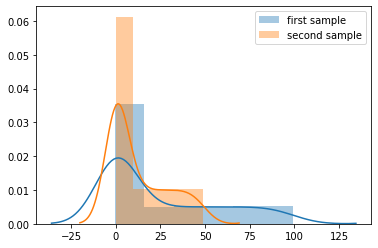

In [0]:
sns.distplot(sample1.values)

sns.distplot(sample2.values)
plt.legend(['first sample','second sample'])
plt.show()